## **Download PaDEL-Descriptor**

In [1]:
#https://pubchem.ncbi.nlm.nih.gov/pc_fetch/pc_fetch.cgi to fetch smiles from pubchem id, also to convert pubchem to chemblids
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip padel.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


## **Load bioactivity data**

The curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Project that essentially contain the pIC50 value will be used for  similarity analysis

In [1]:
import pandas as pd
df1=pd.read_csv('fdb_classification_bioactivity_pIC50_onlyactive_inactive.csv')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chembl_id           297 non-null    object 
 1   molecule_pref_name  244 non-null    object 
 2   target_chembl_id    297 non-null    object 
 3   target_pref_name    297 non-null    object 
 4   target_organism     243 non-null    object 
 5   class               297 non-null    object 
 6   pIC50               297 non-null    float64
 7   pubchem_id          297 non-null    int64  
 8   molecular_weight    297 non-null    float64
 9   hbd_count           297 non-null    int64  
 10  hba_count           297 non-null    int64  
 11  xlogp               296 non-null    float64
 12  natural             297 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 30.3+ KB


,chembl_id,molecule_pref_name,target_chembl_id,target_pref_name,target_organism,class,pIC50,pubchem_id,molecular_weight,hbd_count,hba_count,xlogp,natural
0,CHEMBL165,RESVERATROL,CHEMBL399,HeLa,Homo sapiens,active,10.647817,445154,228.247,3,3,3.1,1
1,CHEMBL19224,PAPAVERINE,CHEMBL613633,Ileum,Rattus norvegicus,active,10.229148,4680,339.391,0,5,3.9,1
2,CHEMBL50,QUERCETIN,CHEMBL2362975,No relevant target,NaN,active,9.958607,5280343,302.238,5,7,1.5,1
3,CHEMBL107,COLCHICINE,CHEMBL3879801,NON-PROTEIN TARGET,NaN,active,9.443697,6167,399.443,1,6,1.0,1
4,CHEMBL441687,GLYCYRRHIZIN,CHEMBL3746,11-beta-hydroxysteroid dehydrogenase 2,Homo sapiens,active,9.397940,14982,822.942,8,16,3.7,1


In [2]:
df_smi=pd.read_csv('fdb_297_onlyactive_inactive_smiles.csv')
df_smi.info()
df_smi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_pref_name  297 non-null    object
 1   pubchem_id          297 non-null    int64 
 2   smiles              297 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.1+ KB


,molecule_pref_name,pubchem_id,smiles
0,1-Aminopropan-2-ol,4,CC(CN)O
1,PROTOCATECHUIC ACID,72,C1=CC(=C(C=C1C(=O)O)O)O
2,PHENYL PROPIONIC ACID,107,C1=CC=C(C=C1)CCC(=O)O
3,GAMMA-AMINOBUTYRIC ACID,119,C(CC(=O)O)CN
4,PARAHYDROXYBENZYL ALCOHOL,125,C1=CC(=CC=C1CO)O


In [3]:
df_chem_pub=df_smi.merge(df1, on=['pubchem_id'], how="inner")
df_chem_pub.head()

,molecule_pref_name_x,pubchem_id,smiles,chembl_id,molecule_pref_name_y,target_chembl_id,target_pref_name,target_organism,class,pIC50,molecular_weight,hbd_count,hba_count,xlogp,natural
0,1-Aminopropan-2-ol,4,CC(CN)O,CHEMBL326602,NaN,CHEMBL364,Plasmodium falciparum,Plasmodium falciparum,inactive,3.096910,75.111,2,2,-1.0,1
1,PROTOCATECHUIC ACID,72,C1=CC(=C(C=C1C(=O)O)O)O,CHEMBL37537,PROTOCATECHUIC ACID,CHEMBL1293263,M18 aspartyl aminopeptidase,Plasmodium falciparum 3D7,active,6.319302,154.121,3,4,1.1,1
2,PHENYL PROPIONIC ACID,107,C1=CC=C(C=C1)CCC(=O)O,CHEMBL851,PHENYL PROPIONIC ACID,CHEMBL3879801,NON-PROTEIN TARGET,NaN,inactive,4.000000,150.177,1,2,1.8,1
3,GAMMA-AMINOBUTYRIC ACID,119,C(CC(=O)O)CN,CHEMBL96,GAMMA-AMINOBUTYRIC ACID,CHEMBL1907607,GABA-A receptor; anion channel,Rattus norvegicus,active,7.886057,103.121,2,3,-3.2,1
4,PARAHYDROXYBENZYL ALCOHOL,125,C1=CC(=CC=C1CO)O,CHEMBL202132,PARAHYDROXYBENZYL ALCOHOL,CHEMBL398,KB,Homo sapiens,inactive,3.698970,124.139,2,2,0.2,1


In [4]:
df_chem_pub.to_csv('pubchem_chembl_smiles_fbd_activity.csv', index=False)
df_chem_pub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   molecule_pref_name_x  297 non-null    object 
 1   pubchem_id            297 non-null    int64  
 2   smiles                297 non-null    object 
 3   chembl_id             297 non-null    object 
 4   molecule_pref_name_y  244 non-null    object 
 5   target_chembl_id      297 non-null    object 
 6   target_pref_name      297 non-null    object 
 7   target_organism       243 non-null    object 
 8   class                 297 non-null    object 
 9   pIC50                 297 non-null    float64
 10  molecular_weight      297 non-null    float64
 11  hbd_count             297 non-null    int64  
 12  hba_count             297 non-null    int64  
 13  xlogp                 296 non-null    float64
 14  natural               297 non-null    int64  
dtypes: float64(3), int64(4)

In [5]:
selection = ['smiles','chembl_id']
df2_selection = df_chem_pub[selection]
df2_selection.to_csv('molecule.smi', sep='\t', index=False, header= False)

In [6]:
! cat molecule.smi | head -5

C[C@@]12CC[C@H]3[C@]([C@@]14[C@H](O4)C(=O)O[C@H]2C5=COC=C5)(C(=O)C[C@@H]6[C@@]37COC(=O)C[C@@H]7OC6(C)C)C	CHEMBL517449
C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O	CHEMBL50
COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CCN3C[C@@H]4C=C)O	CHEMBL170
CC1=C2C[C@@H](CC[C@]2(CCC1)C)C(C)(C)O	CHEMBL477900
CC(=O)N[C@H]1CCC2=CC(=C(C(=C2C3=CC=C(C(=O)C=C13)OC)OC)OC)OC	CHEMBL107


In [7]:
! cat molecule.smi | wc -l

382



## **Calculate pubchem fingerprint descriptors using Padel Descriptor Software**
### **Calculate PaDEL descriptors**


In [11]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [12]:
! bash padel.sh

Processing CHEMBL517449 in molecule.smi (1/382). 
Processing CHEMBL477900 in molecule.smi (4/382). 
Processing CHEMBL50 in molecule.smi (2/382). 
Processing CHEMBL170 in molecule.smi (3/382). 
Processing CHEMBL130 in molecule.smi (7/382). 
Processing CHEMBL107 in molecule.smi (5/382). 
Processing CHEMBL165 in molecule.smi (8/382). 
Processing CHEMBL150 in molecule.smi (6/382). 
Processing CHEMBL297453 in molecule.smi (9/382). 
Processing CHEMBL146 in molecule.smi (10/382). 
Processing CHEMBL108861 in molecule.smi (11/382). 
Processing CHEMBL47386 in molecule.smi (35/382). 
Processing CHEMBL19224 in molecule.smi (12/382). 
Processing CHEMBL44 in molecule.smi (13/382). 
Processing CHEMBL532 in molecule.smi (14/382). 
Processing CHEMBL545 in molecule.smi (15/382). 
Processing CHEMBL48310 in molecule.smi (16/382). 
Processing CHEMBL45967 in molecule.smi (17/382). 
Processing CHEMBL441687 in molecule.smi (18/382). 
Processing CHEMBL222021 in molecule.smi (19/382). 
Processing CHEMBL1157 in 

Processing CHEMBL308187 in molecule.smi (121/382). Average speed: 0.12 s/mol.
Processing CHEMBL328441 in molecule.smi (122/382). Average speed: 0.12 s/mol.
Processing CHEMBL274467 in molecule.smi (123/382). Average speed: 0.12 s/mol.
Processing CHEMBL201083 in molecule.smi (124/382). Average speed: 0.12 s/mol.
Processing CHEMBL21932 in molecule.smi (125/382). Average speed: 0.12 s/mol.
Processing CHEMBL450288 in molecule.smi (126/382). Average speed: 0.12 s/mol.
Processing CHEMBL185885 in molecule.smi (127/382). Average speed: 0.12 s/mol.
Processing CHEMBL66 in molecule.smi (128/382). Average speed: 0.12 s/mol.
Processing CHEMBL1950582 in molecule.smi (129/382). Average speed: 0.12 s/mol.
Processing CHEMBL232202 in molecule.smi (130/382). Average speed: 0.11 s/mol.
Processing CHEMBL451532 in molecule.smi (131/382). Average speed: 0.11 s/mol.
Processing CHEMBL25719 in molecule.smi (133/382). Average speed: 0.11 s/mol.
Processing CHEMBL486422 in molecule.smi (132/382). Average speed: 0.1

Processing CHEMBL225153 in molecule.smi (227/382). Average speed: 0.08 s/mol.
Processing CHEMBL470671 in molecule.smi (228/382). Average speed: 0.08 s/mol.
Processing CHEMBL29411 in molecule.smi (229/382). Average speed: 0.08 s/mol.
Processing CHEMBL249592 in molecule.smi (230/382). Average speed: 0.08 s/mol.
Processing CHEMBL445206 in molecule.smi (231/382). Average speed: 0.08 s/mol.
Processing CHEMBL73639 in molecule.smi (232/382). Average speed: 0.08 s/mol.
Processing CHEMBL83159 in molecule.smi (233/382). Average speed: 0.08 s/mol.
Processing CHEMBL925 in molecule.smi (234/382). Average speed: 0.08 s/mol.
Processing CHEMBL1224557 in molecule.smi (235/382). Average speed: 0.08 s/mol.
Processing CHEMBL247484 in molecule.smi (236/382). Average speed: 0.08 s/mol.
Processing CHEMBL14021 in molecule.smi (237/382). Average speed: 0.08 s/mol.
Processing CHEMBL46931 in molecule.smi (238/382). Average speed: 0.08 s/mol.
Processing CHEMBL773 in molecule.smi (240/382). Average speed: 0.08 s/m

Processing CHEMBL1114 in molecule.smi (336/382). Average speed: 0.07 s/mol.
Processing CHEMBL473366 in molecule.smi (337/382). Average speed: 0.06 s/mol.
Processing CHEMBL276849 in molecule.smi (338/382). Average speed: 0.07 s/mol.
Processing CHEMBL3183500 in molecule.smi (339/382). Average speed: 0.06 s/mol.
Processing CHEMBL108030 in molecule.smi (341/382). Average speed: 0.07 s/mol.
Processing CHEMBL264141 in molecule.smi (340/382). Average speed: 0.07 s/mol.
Processing CHEMBL195827 in molecule.smi (342/382). Average speed: 0.06 s/mol.
Processing CHEMBL379630 in molecule.smi (344/382). Average speed: 0.06 s/mol.
Processing CHEMBL104875 in molecule.smi (345/382). Average speed: 0.06 s/mol.
Processing CHEMBL361197 in molecule.smi (347/382). Average speed: 0.06 s/mol.
Processing CHEMBL190927 in molecule.smi (346/382). Average speed: 0.06 s/mol.
Processing CHEMBL298717 in molecule.smi (348/382). Average speed: 0.06 s/mol.
Processing CHEMBL365316 in molecule.smi (343/382). Average speed:

In [6]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.rename(columns = {'Name':'chembl_id'}, inplace = True) 

In [7]:
df3_X

,chembl_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL545,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL576,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1157,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL196,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,CHEMBL3617994,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,CHEMBL430341,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
379,CHEMBL110309,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,CHEMBL2368547,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
selection_2 = ['chembl_id','class']
df3_selection = df_chem_pub[selection_2]
df4_pca=df3_X.merge(df3_selection,on=['chembl_id'],how="inner")
df5_tc=df4_pca.drop(['chembl_id','class'], axis =1)
df4_pca.info()
df4_pca.head()
#df5_tc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Columns: 883 entries, chembl_id to class
dtypes: int64(881), object(2)
memory usage: 2.0+ MB


,chembl_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,class
0,CHEMBL576,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1,CHEMBL1157,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
2,CHEMBL3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
3,CHEMBL196,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
4,CHEMBL48310,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active


<font size=4> <b> Tanimoto Coefficient </b> </font>

In [9]:
df4_pca['pubchem_fp'] = df5_tc[df5_tc.columns[:]].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)
df4_pca.head()

,chembl_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,class,pubchem_fp
0,CHEMBL576,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,active,1000000001100000001110000000000000000000000000...
1,CHEMBL1157,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,active,1100000001100000001110000000000000000000000000...
2,CHEMBL3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,active,1100000001110011000000000000000000000000000000...
3,CHEMBL196,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,active,1100000001100000001110000000000000000000000000...
4,CHEMBL48310,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,active,1100000001110000001100000000000000000000000000...


<font size=4> <b> Making Pairs of Query and Target for Tanimoto Pairwise Similarity Calculation </b> </font>

In [10]:
#df_pca= df_pca.set_index("chembl_id")
import itertools
cc1 = list(itertools.combinations(df4_pca['chembl_id'],2))
df_cc=pd.DataFrame(data=cc1,columns=['Query','Target'])
df_cc.head()

,Query,Target
0,CHEMBL576,CHEMBL1157
1,CHEMBL576,CHEMBL3
2,CHEMBL576,CHEMBL196
3,CHEMBL576,CHEMBL48310
4,CHEMBL576,CHEMBL7303


In [11]:
#df4_pca['pubchem_fp'].[df_pca]
df4_pca.loc[df4_pca['chembl_id'] == 'CHEMBL576', 'pubchem_fp'].iloc[0]

'10000000011000000011100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001101000000000000000000000100000000000000000000000100000000000100000001000000000000000000000000000100000000000000000000000001000000000000010000000000000000000100100000000100000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000010000000000000000000000000000000000000100000000000000000001000000000000000000000000000000000000000000010000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'

<font size=4> <b> Install Rdkit package </b> </font>

In [18]:
! conda install -c rdkit rdkit -y

Solving environment: ...working... done

# All requested packages already installed.



<font size=4> <b> Generating Bitvectors from Pubchem Fingerprints </b> </font>

In [12]:
from rdkit import DataStructs
for i in range(len(df_cc)):
    ref = df_cc.Query[i]
    bit=df4_pca.loc[df4_pca['chembl_id'] == ref, 'pubchem_fp'].iloc[0]
    bitvect = DataStructs.CreateFromBitString(bit)

In [13]:
df_chem_pub.head()

,molecule_pref_name_x,pubchem_id,smiles,chembl_id,molecule_pref_name_y,target_chembl_id,target_pref_name,target_organism,class,pIC50,molecular_weight,hbd_count,hba_count,xlogp,natural
0,1-Aminopropan-2-ol,4,CC(CN)O,CHEMBL326602,NaN,CHEMBL364,Plasmodium falciparum,Plasmodium falciparum,inactive,3.096910,75.111,2,2,-1.0,1
1,PROTOCATECHUIC ACID,72,C1=CC(=C(C=C1C(=O)O)O)O,CHEMBL37537,PROTOCATECHUIC ACID,CHEMBL1293263,M18 aspartyl aminopeptidase,Plasmodium falciparum 3D7,active,6.319302,154.121,3,4,1.1,1
2,PHENYL PROPIONIC ACID,107,C1=CC=C(C=C1)CCC(=O)O,CHEMBL851,PHENYL PROPIONIC ACID,CHEMBL3879801,NON-PROTEIN TARGET,NaN,inactive,4.000000,150.177,1,2,1.8,1
3,GAMMA-AMINOBUTYRIC ACID,119,C(CC(=O)O)CN,CHEMBL96,GAMMA-AMINOBUTYRIC ACID,CHEMBL1907607,GABA-A receptor; anion channel,Rattus norvegicus,active,7.886057,103.121,2,3,-3.2,1
4,PARAHYDROXYBENZYL ALCOHOL,125,C1=CC(=CC=C1CO)O,CHEMBL202132,PARAHYDROXYBENZYL ALCOHOL,CHEMBL398,KB,Homo sapiens,inactive,3.698970,124.139,2,2,0.2,1


<font size=4> <b> Displaying chemical strs. of 297 active and inactive flavor molecules  </b> </font>

C:\Users\91809\Anaconda3\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


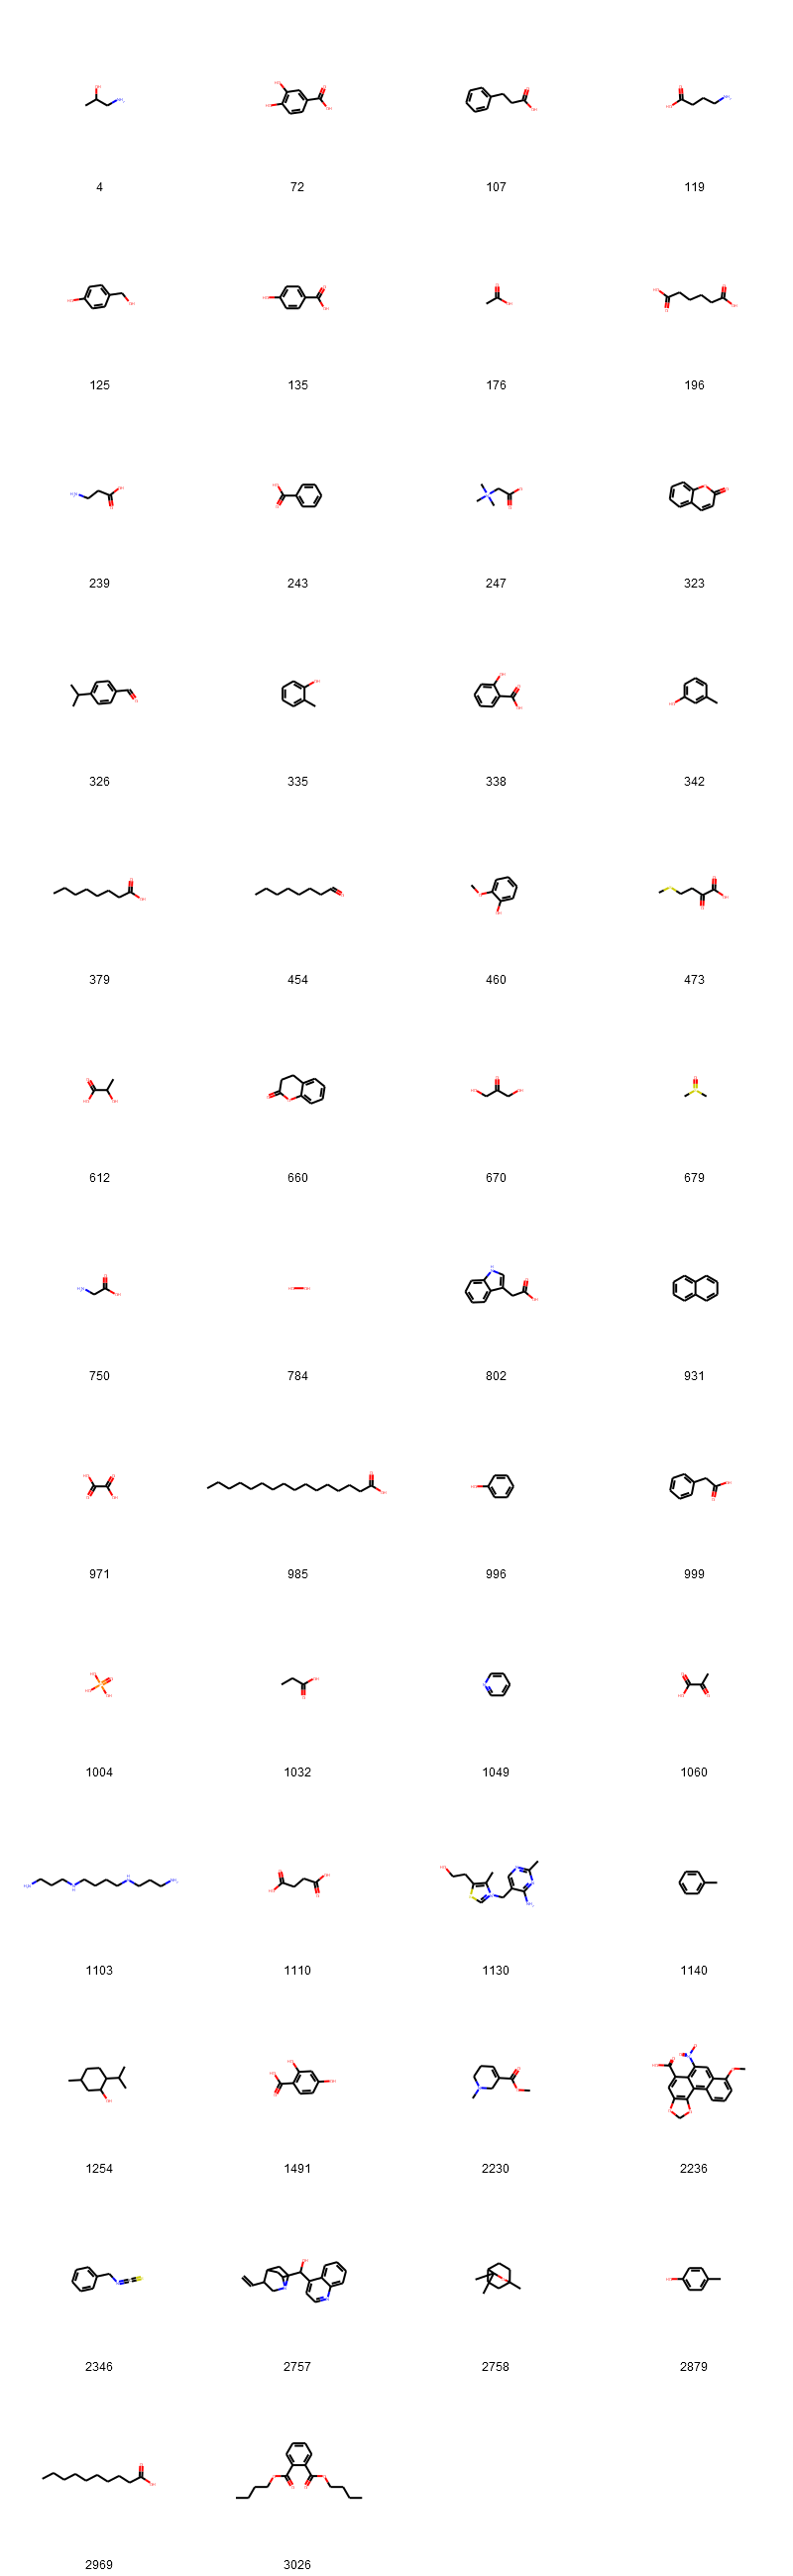

In [14]:
import requests
import time
from rdkit import Chem
from rdkit.Chem import Draw
mols = [ Chem.MolFromSmiles(x) for x in df_chem_pub['smiles'] ]
Chem.Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200,200), legends=[str(x) for x in df_chem_pub['pubchem_id']] )

In [17]:
df_cc.head()

,Query,Target
0,CHEMBL576,CHEMBL1157
1,CHEMBL576,CHEMBL3
2,CHEMBL576,CHEMBL196
3,CHEMBL576,CHEMBL48310
4,CHEMBL576,CHEMBL7303


In [18]:
#type(fp1)
scores = []
from rdkit import DataStructs
for i in range(len(df_cc)):
    ref = df_cc.Query[i]
    comp=df_cc.Target[i]
    bit_ref=df4_pca.loc[df4_pca['chembl_id'] == ref, 'pubchem_fp'].iloc[0]
    bit_comp=df4_pca.loc[df4_pca['chembl_id'] == comp, 'pubchem_fp'].iloc[0]
    bitvect_ref = DataStructs.CreateFromBitString(bit_ref)
    bitvect_comp = DataStructs.CreateFromBitString(bit_comp)
    fps_ref=bitvect_ref
    fps_comp=bitvect_comp
    #print(ref,comp)
   # print("Tanimoto    :", round(DataStructs.TanimotoSimilarity(fps_ref, fps_comp), 4))
    scores.append(DataStructs.TanimotoSimilarity(fps_ref, fps_comp))

In [34]:
len(scores), len(df_cc)

(43956, 43956)

In [ ]:
plt.figure(figsize=(7,7))

sns.countplot(x='natural', data=df_fla,palette=['gold','cornflowerblue'])

plt.xlabel('Type of Flavor molecule', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_synthtic_nativecount_class.png')

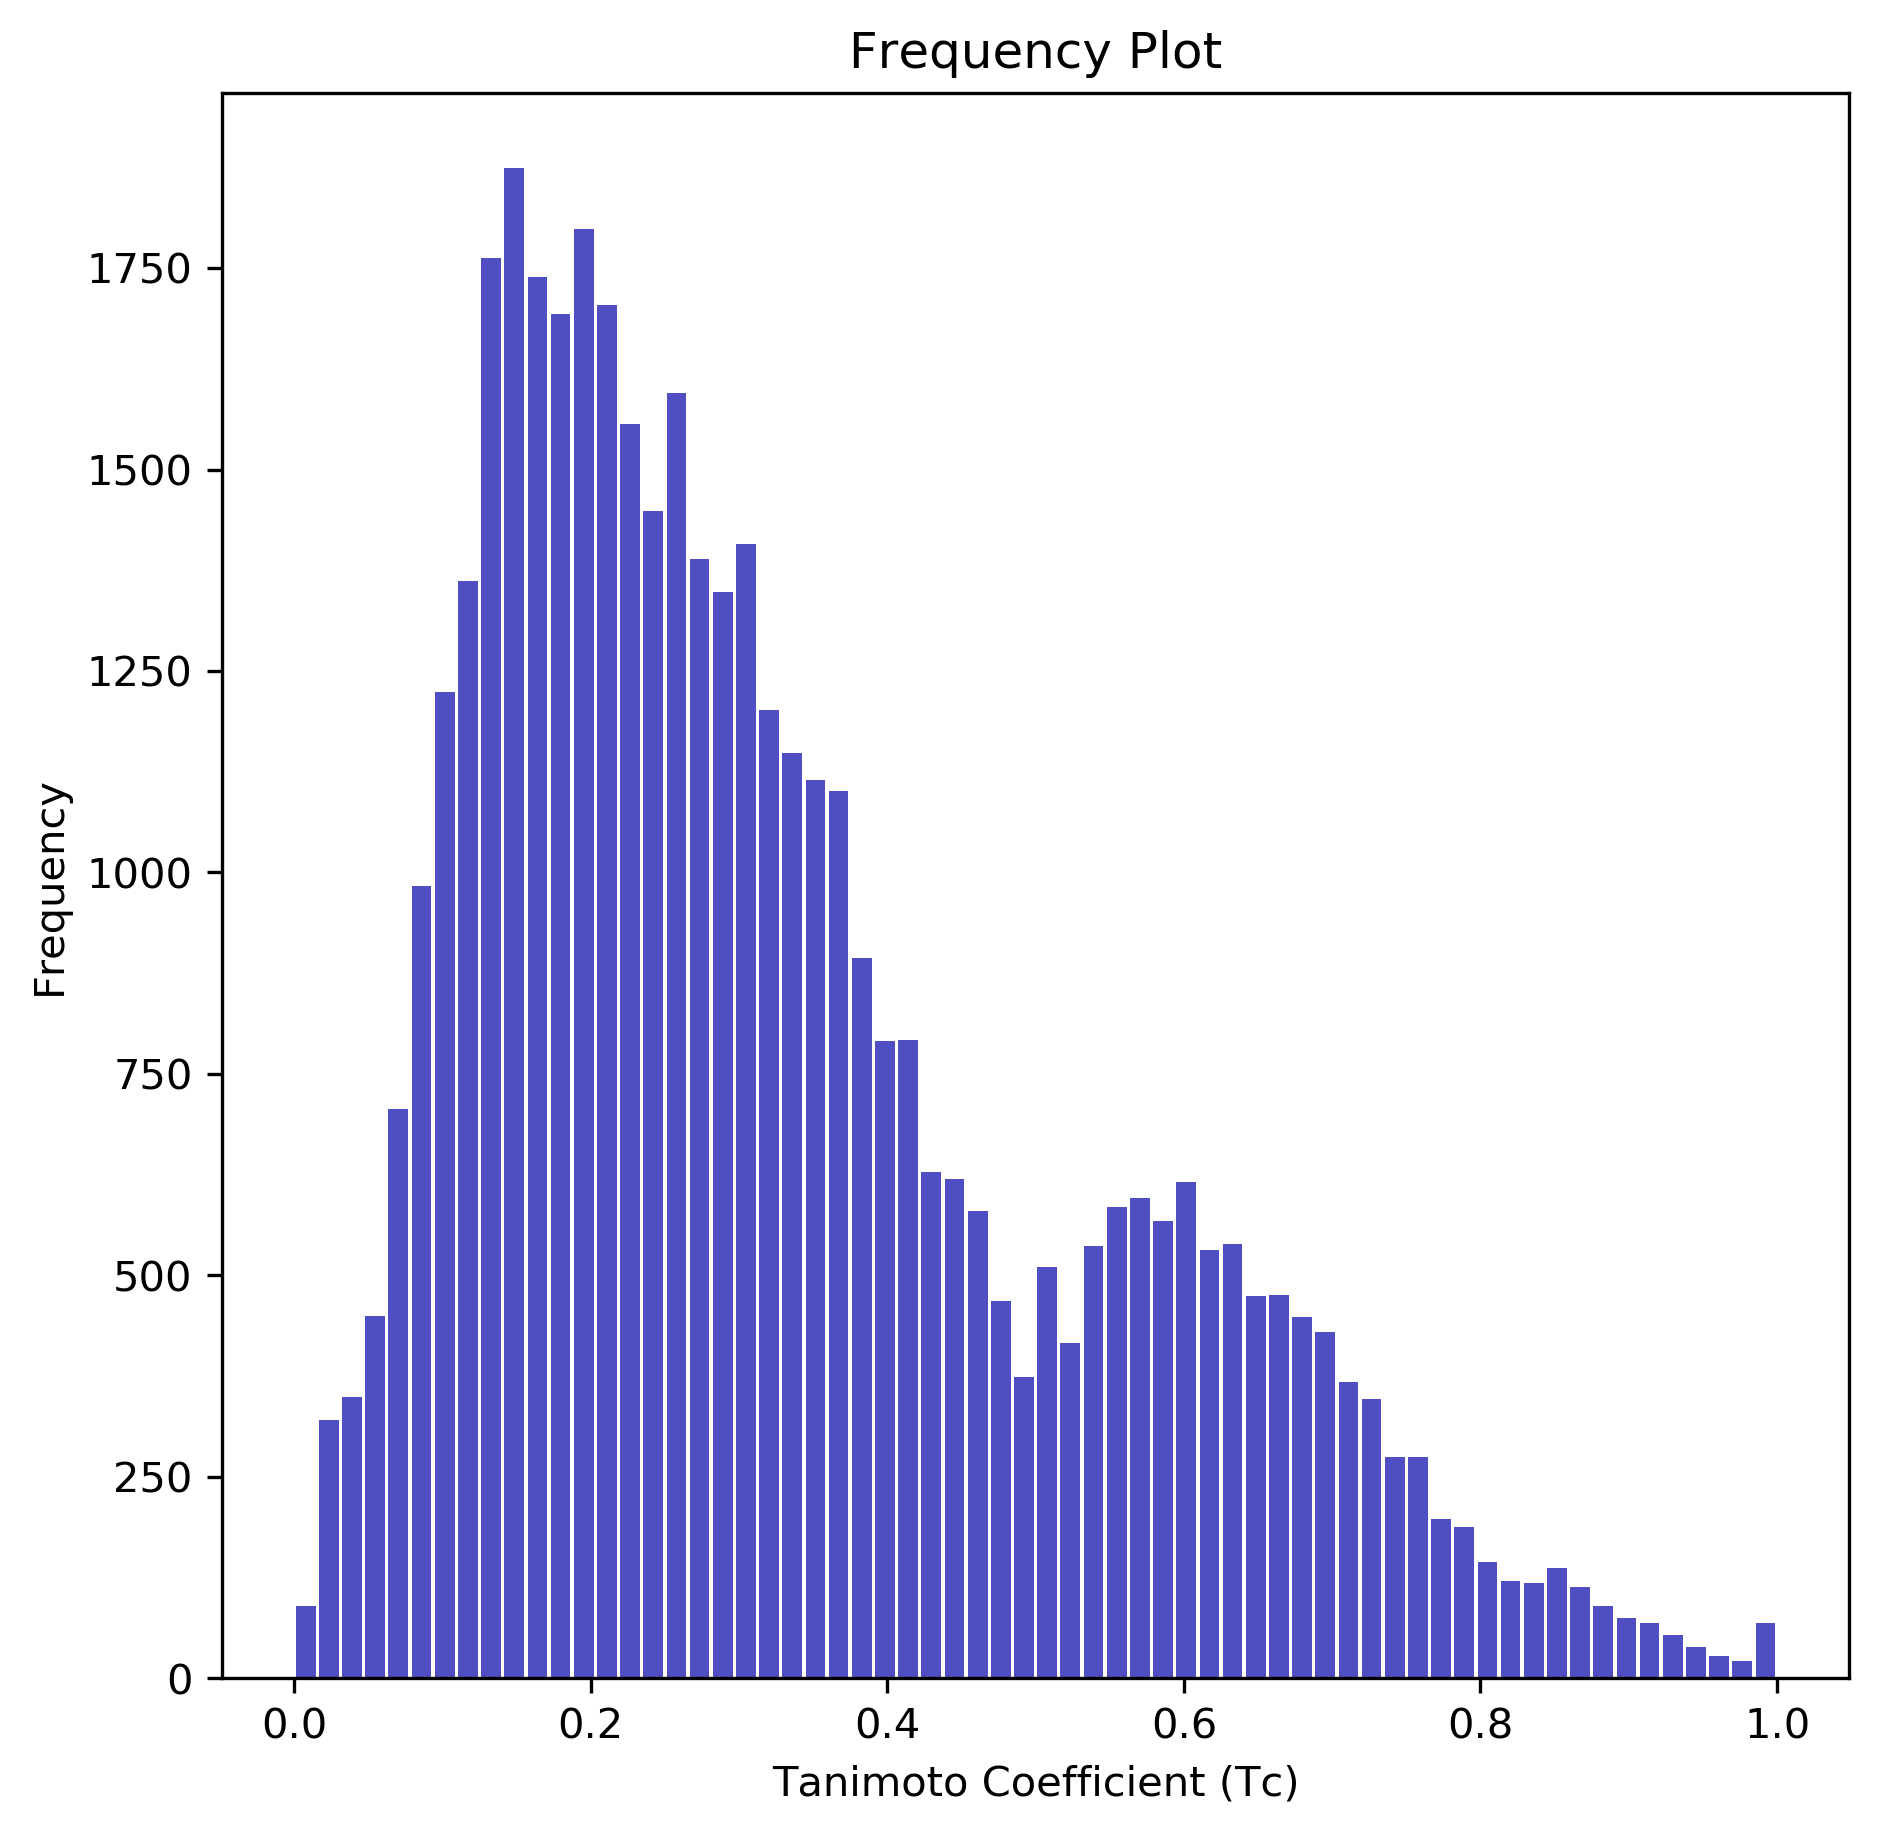

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=300)
# An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(x=scores, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)

plt.xlabel('Tanimoto Coefficient (Tc)')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
#plt.figure(figsize=(7,7))
plt.savefig('plot_tc_nativecount_class.png')
#plt.text(0.33, r'$\mu=15')
#maxfreq = n.max()


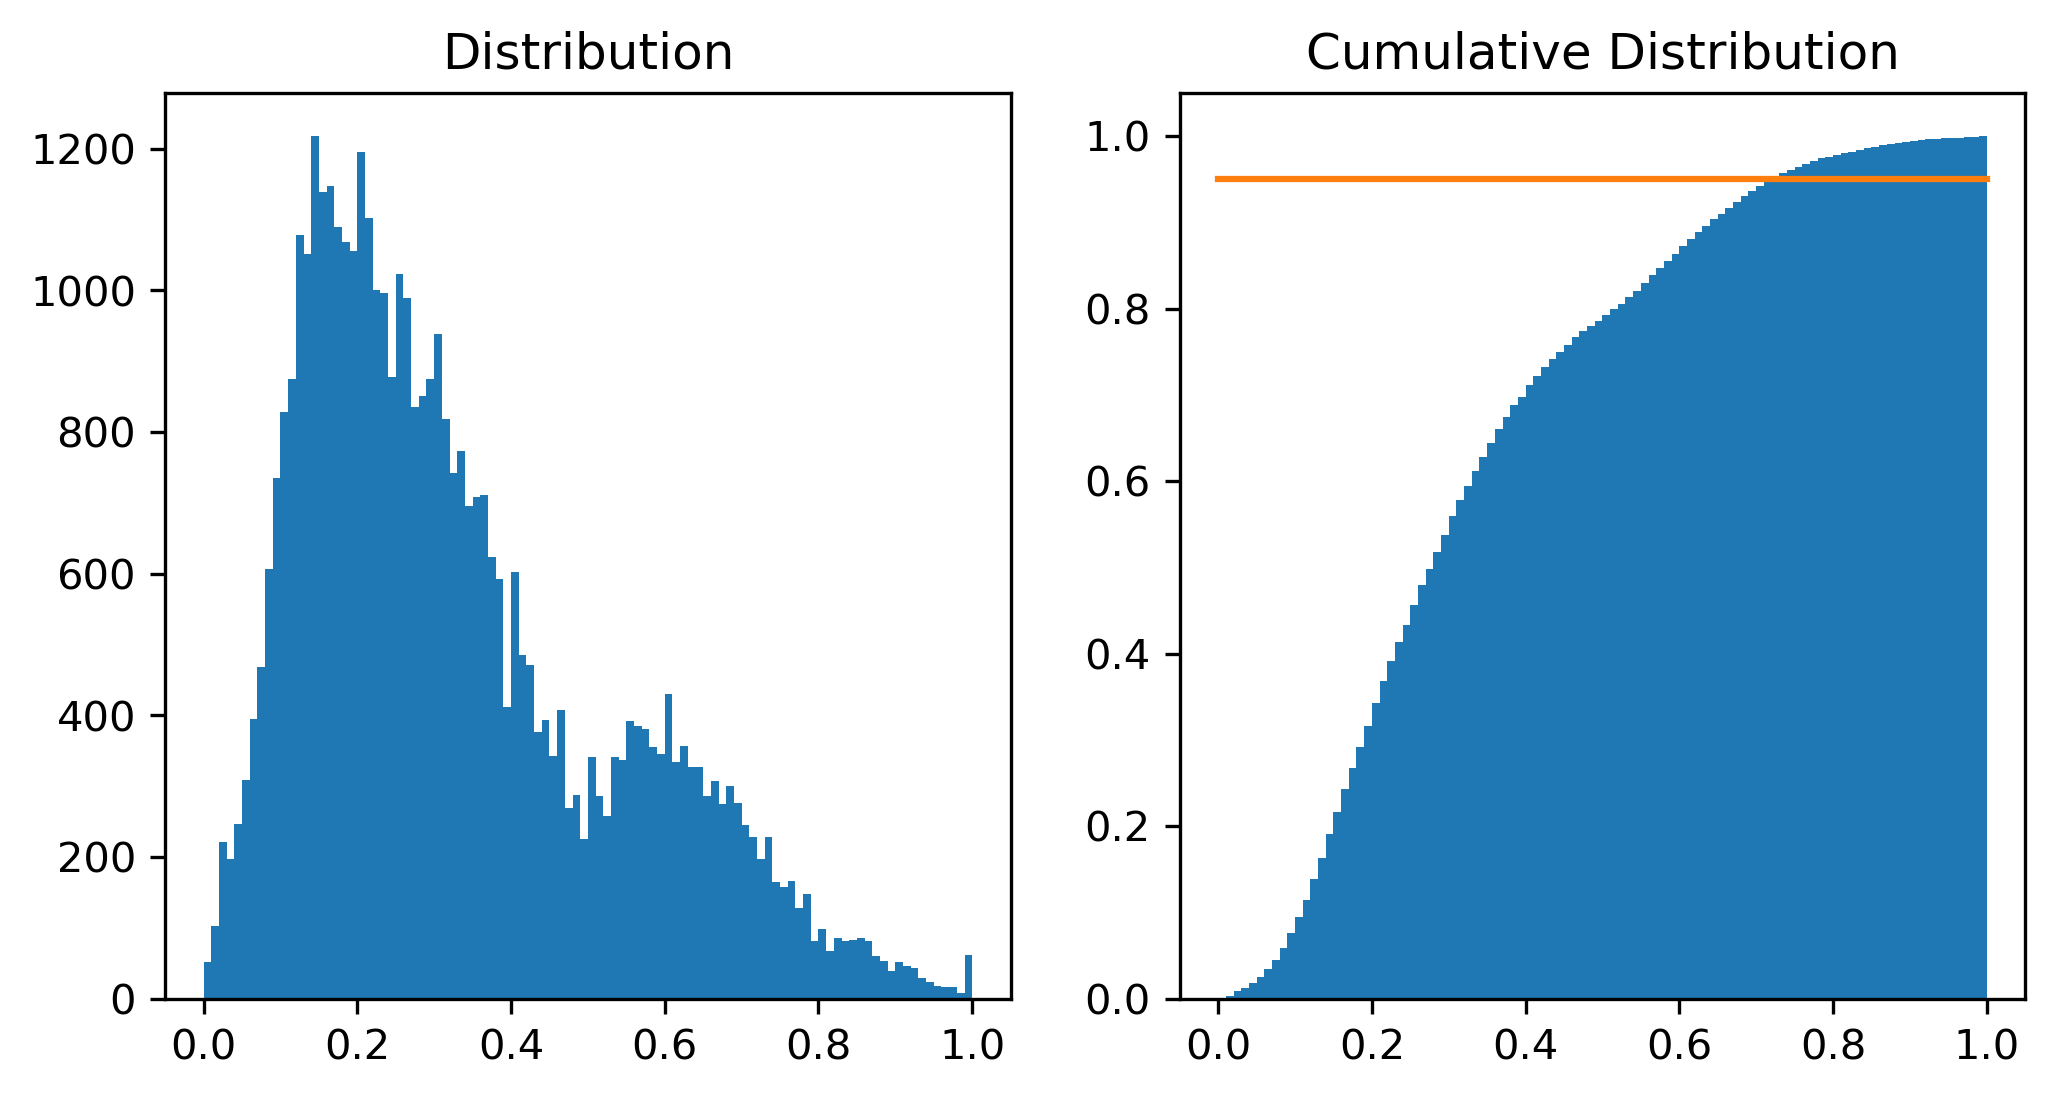

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
mybins = [ x * 0.01 for x in range(101)]

fig = plt.figure(figsize=(8,4), dpi=300)

plt.subplot(1, 2, 1)
plt.title("Distribution")
plt.hist(scores, bins=mybins)

plt.subplot(1, 2, 2)
plt.title("Cumulative Distribution")
plt.hist(scores, bins=mybins, density=True, cumulative=1)
plt.plot([0,1],[0.95,0.95]);

In [36]:
for i in range(21) :

    thresh = i / 20
    num_similar_pairs = len([x for x in scores if x >= thresh]) 
    prob = num_similar_pairs / len(scores) * 100
    print("%.3f %8d (%8.4f %%)" % (thresh, num_similar_pairs, round(prob,4)))

0.000    43956 (100.0000 %)
0.050    43135 ( 98.1322 %)
0.100    40620 ( 92.4106 %)
0.150    35569 ( 80.9196 %)
0.200    30069 ( 68.4070 %)
0.250    24896 ( 56.6385 %)
0.300    20322 ( 46.2326 %)
0.350    16385 ( 37.2759 %)
0.400    13308 ( 30.2757 %)
0.450    10980 ( 24.9795 %)
0.500     9445 ( 21.4874 %)
0.550     7880 ( 17.9270 %)
0.600     6021 ( 13.6978 %)
0.650     4245 (  9.6574 %)
0.700     2819 (  6.4132 %)
0.750     1734 (  3.9449 %)
0.800     1051 (  2.3910 %)
0.850      636 (  1.4469 %)
0.900      315 (  0.7166 %)
0.950      121 (  0.2753 %)
1.000       56 (  0.1274 %)


In [37]:
print("Average:", sum(scores)/len(scores))

Average: 0.33088463035201027


Using molecular fingeprints. we can compute the similarity scores between molecules.  However, how should these scores be interpreted?  For example, the Tanimoto score between CID 60823 and CID 446155 is computed to be 0.662, but does it mean that the two compounds are similar?  How similar is similar?  The following analysis would help answer these questions.


From the distribution of the similarity scores among 297 natural compounds, we observe the following:<br>
- If you randomly select two compounds from this dataset, the similarity score between them (computed using the Tanimoto equation and PubChem fingerprints) is ~0.33 on average.
- About  18 % of randomly selected compound pairs have a similarity score greater than 0.55.
- About 9% of randomly selected compound pairs have a similarity score greater than 0.65.

If two compounds have a Tanimoto score of 0.33, it is close to the average Tanimoto score between randomly selected compounds from our dataset and there is a 50% chance that you will get a score of 0.33 or greater just by selecting two compounds from PubChem.  Therefore, it is reasonable to consider the two compounds are not similar.<br>

The Tanimoto index may have a value ranging from 0 (for no similarity) to 1 (for identical molecules) and the midpoint of this value range is 0.5.  Because of this, a Tanimoto score of **0.55** may not sound great enough to consider two compounds to be similar.  However, according to the score distribution curve generated here, only **~17%** of randomly selected compound pairs will have a score greater than this.<br>

In the previous section, we computed the similarity scores between some cholesterol-lowering drugs, and CID 60823 and CID 446155 had a Tanimoto score of **0.662**.  Based on the score distribution curve generated in the second section, we can say that the probablilty of two randomly selected compounds from PubChem having a Tanimoto score greater than 0.662 is **less than 9%**.

The following code cell demonstrates how to find an appropriate similarity score threshold above which a given percentage of the compound pairs will be considered to be similar to each other.

In [40]:
scores.sort() # Sort the scores in an increasing order.

In [41]:
# to find a threshold for top 5% compound pairs (i.e., 95% percentile)
print("# total compound pairs:   ", len(scores))
print("# 95% of compound pairs:  ", len(scores) * 0.95)
print("# score at 95% percentile:", scores[ round(len(scores) * 0.95) ] )

# total compound pairs:    43956
# 95% of compound pairs:   42637.32
# score at 95% percentile: 0.7762237762237763


<font size=4> <b> PCA and tSNE of active and inactive flavor molecules  </b> </font>

In [39]:
from sklearn.decomposition import PCA
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


In [25]:
pca = PCA(n_components=2)
df4_pca.head()
df5=df4_pca.drop(['chembl_id','class','pubchem_fp'], axis=1)
crds = pca.fit_transform(df5)

In [36]:
# X = df.drop(['POPULATION'], axis = 1)
# Y = df['POPULATION']
# X = pd.get_dummies(X, prefix_sep='_')
# Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(df5)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df4_pca['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

,PC1,PC2,class
0,5.489498,-7.237064,0
1,4.904657,-6.804352,0
2,13.635824,19.299477,0
3,2.144082,-4.545019,0
4,2.082286,-4.406270,0


In [21]:
set(PCA_df['class'])

{0, 1}

In [41]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

# boston = load_boston()
#df = pd.DataFrame(boston.data, columns=boston.feature_names)
n_components = 4

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

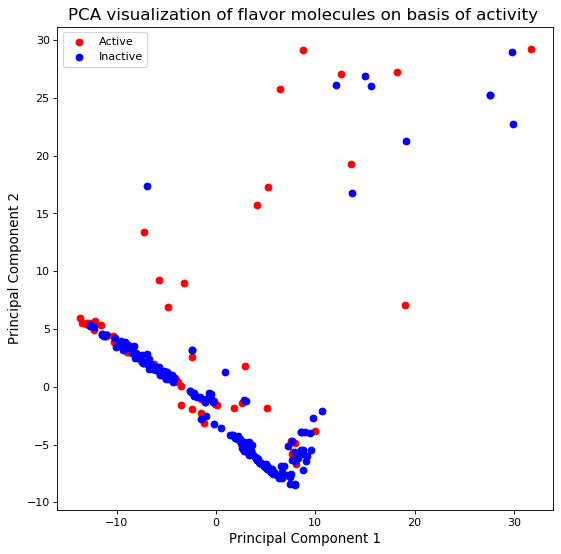

In [42]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [0,1,2]
colors = ['r', 'b',"g"]
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], PCA_df.loc[PCA_df['class'] == clas, 'PC2'], c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('PCA visualization of flavor molecules on basis of activity ', fontsize = 15)
plt.legend(['Active', 'Inactive'])
#plt.grid()
plt.savefig('pca_fdb.png')

In [22]:
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1500)
X_tsne = tsne.fit_transform(df5)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 297 samples in 0.027s...
[t-SNE] Computed neighbors for 297 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 297 / 297
[t-SNE] Mean sigma: 2.682502
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.885036
[t-SNE] KL divergence after 1500 iterations: 0.288904
t-SNE done! Time elapsed: 1.3642065525054932 seconds


In [27]:
set(df4_pca['class'])

{'active', 'inactive'}

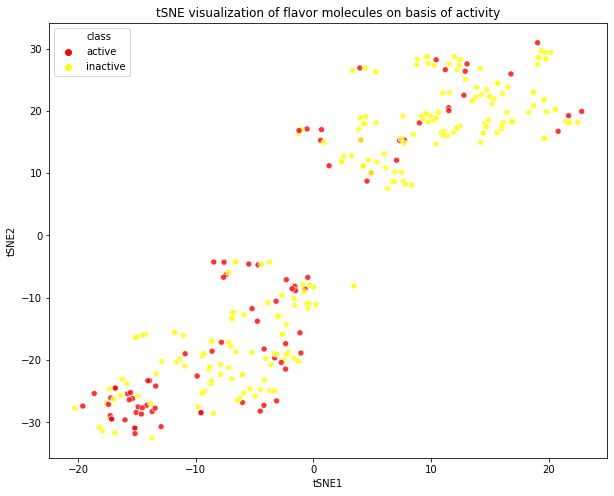

In [23]:
color_dict = dict({'active':'red', 'inactive':'yellow','intermediate': 'green'})
ax=sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    data=df4_pca,
    hue="class",
    hue_order=["active","inactive"],
    palette=color_dict,
    legend="brief",
    alpha=0.8
)
ax.set(xlabel = "tSNE1",
      ylabel = "tSNE2",
      title = "tSNE visualization of flavor molecules on basis of activity")
#plt.figure(figsize=(16,9))
plt.gcf().set_size_inches(10, 8)
plt.savefig("tsne_superpop_4.png")

Flavor Molecules from both the classes have similar chemical space